### 1. Setting

The most reality would be a target that depends a more complex formula. That, we would look at that formula:

Formula:
$$
Y = 10sin(X_1X_2\pi) + 20(X_3 - 0.5)^ 2 + 10X_4 + 5X_5 + \epsilon.
$$

where $\epsilon \sim N(0, \sigma_1^2)$ is normally distributed additive noise, but there are also $d$ other irrelevant variables $X_6, \dots, X_{d+1}$. And we assume that we don't know which variable is determining $Y$. We assume that all the $X$ variables are distributed independently are independent features uniformly distributed on $\{0,1\}$.

### 1.1 Experiment

In this scenario, we set $300$ features ($5$ relevant and $295$ irrelevant features) and choose to select top $10$ features. 

We will increase sample data size $n \in \{50, 100, 200, 300, 500, 700, 900, 1200, 2000\}$. For each $n$, we repeat $100$ times 

we use LinearGAM to solve this problem:

$$𝑔(𝔼[𝑦|𝑋])=𝛽_0+𝑓_1(X_1X_2)+ 𝑓_2(X_3) + f_3(X_4) + f_5(X_5)
$$


After that, we use test data (distributed independently) and calculate RMSE, which is:

$$
RMSE = \frac{1}{100} \sum_j^{100} \sqrt {\sum_i^{m} (y_i-\hat y_i)^2}
$$

where $m$ is the number of test data points $(x_i, y_i)$, $y_i$ is the real value and $\hat y_i$ is the estimated value.

We also use $R^2$ to find the relationship among the variables:

$$
R^2 = 1 - \frac{\sum(y_i - \hat y_i)^2}{\sum(y_i - \bar y)^2}
$$

In [1]:
import matplotlib.pyplot as plt
import random
from numpy import *
import numpy as np
from nltk.probability import *
from mpl_toolkits import mplot3d
import math
import sklearn.datasets
from scipy.stats import entropy
import itertools
from scipy.stats import pearsonr
import pandas as pd
from pygam import LinearGAM, s, te
from binning import *
from estimators import *

We try some case:   
    1. Ideal plot 
    2. some correct terms and other terms in pairs
    3. all terms are in pairs
    4. add all irrelvent features (will raise error)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


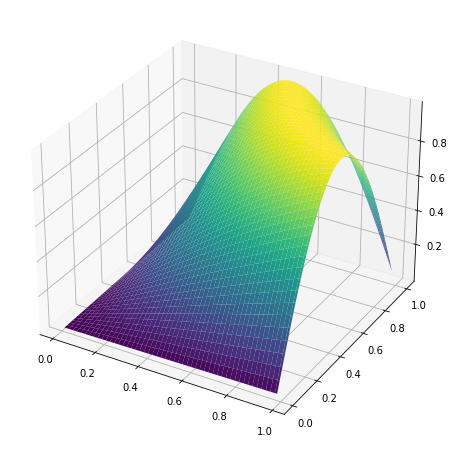

In [2]:
x, y = sklearn.datasets.make_friedman1(n_samples=200, n_features=10, noise=1, random_state=None)
gam1 = LinearGAM(te(0,1) + s(2) + s(3) + s(4))
gam1.gridsearch(x, y)

plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)
XX = gam1.generate_X_grid(term=0, meshgrid=True) # term 0
Z = gam1.partial_dependence(term=0, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], np.sin(XX[0]*XX[1]*np.pi), cmap='viridis') # z is np.sin*pi # plot issue

In [32]:
# make subplot compare to figure gam terms to two terms from distribuiton definition.
# can be fixed s

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


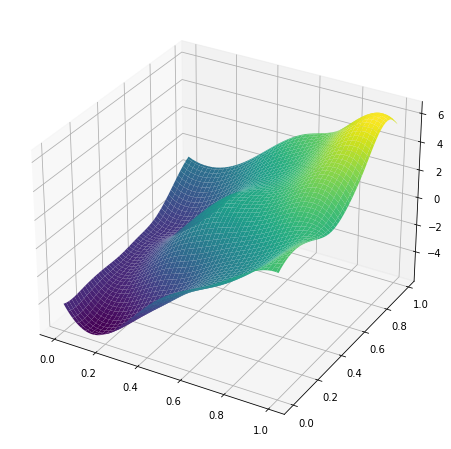

In [39]:
gam2 = LinearGAM(te(0,1) + s(2) + te(3,4))
gam2.gridsearch(x, y)

plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)
XX = gam2.generate_X_grid(term=2, meshgrid=True) # term 0
Z = gam2.partial_dependence(term=2, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')
# 

100% (11 of 11) |########################| Elapsed Time: 0:00:12 Time:  0:00:12


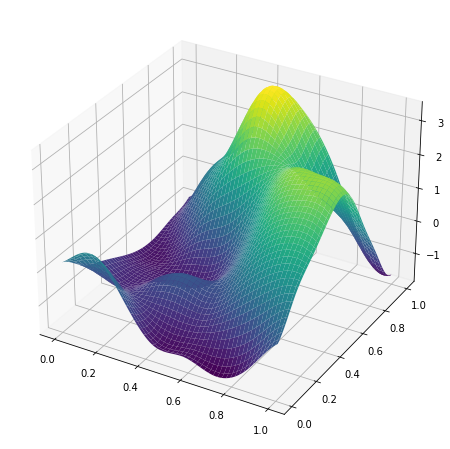

In [46]:
gam3 = LinearGAM(te(0,1) + te(0,2) + te(0,3) + te(0,4) +
                te(1,2) + te(1,3) + te(1,4) + 
                te(2,3) + te(2,4) + te(3,4))
gam3.gridsearch(x, y)

plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)
XX = gam3.generate_X_grid(term=0, meshgrid=True) # term 0
Z = gam3.partial_dependence(term=0, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

__Explore Errors__

In [58]:
x, y = sklearn.datasets.make_friedman1(n_samples=2000, n_features=10, noise=1, random_state=None)
x_test, y_test = sklearn.datasets.make_friedman1(n_samples=2000, n_features=10, noise=1, random_state=None)


In [ ]:
gam1 = LinearGAM(te(0,1) + s(2) + s(3) + s(4))
gam1.gridsearch(x, y)

np.mean((y_test - gam1.predict(x_test))**2)**0.5

In [ ]:
gam2 = LinearGAM(te(0,1) + s(2) + te(3,4))
gam2.gridsearch(x, y)

np.mean((y_test - gam2.predict(x_test))**2)**0.5

In [ ]:
gam3 = LinearGAM(te(0,1) + te(0,2) + te(0,3) + te(0,4) +
                te(1,2) + te(1,3) + te(1,4) + 
                te(2,3) + te(2,4) + te(3,4))
gam3.gridsearch(x, y)

np.mean((y_test - gam3.predict(x_test))**2)**0.5

In [ ]:
gam4 = LinearGAM(s(1) + s(2) + s(3) + s(4) + s(0))
gam4.gridsearch(x, y)

np.mean((y_test - gam4.predict(x_test))**2)**0.5

In [ ]:
gam5 = LinearGAM(te(0,1,2) + s(3) + s(4)) #not make sense. learning curve stastical efficient, competition 
gam5.gridsearch(x, y)

np.mean((y_test - gam5.predict(x_test))**2)**0.5

In [ ]:
# plot learning curve in n 

In [59]:
def model_evaluate(x_train, y_train, x_test, y_test):
    """
    """
    gam = LinearGAM().fit(x_train, y_train)

    # calculate RMSE
    rmse = np.mean((y_test - gam.predict(x_test))**2)
    rmse = math.sqrt(rmse)
    
    # r_sqaure
    r_square = 1- np.sum((y_test - gam.predict(x_test))**2)/np.sum((y_test - np.mean(y_test))**2)
    
    return rmse, r_square

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


1.003157491408992

In [60]:
gam2 = LinearGAM(te(0,1) + s(2) + te(3,4))
gam2.gridsearch(x, y)

np.mean((y_test - gam2.predict(x_test))**2)**0.5

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


0.9994405360694698

In [64]:
gam3 = LinearGAM(te(0,1) + te(0,2) + te(0,3) + te(0,4) +
                te(1,2) + te(1,3) + te(1,4) + 
                te(2,3) + te(2,4) + te(3,4))
gam3.gridsearch(x, y)

np.mean((y_test - gam3.predict(x_test))**2)**0.5

100% (11 of 11) |########################| Elapsed Time: 0:00:27 Time:  0:00:27


1.0145852704358833

In [61]:
gam4 = LinearGAM(s(1) + s(2) + s(3) + s(4) + s(0))
gam4.gridsearch(x, y)

np.mean((y_test - gam4.predict(x_test))**2)**0.5

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


1.6240773855170327

In [62]:
gam5 = LinearGAM(te(0,1,2) + s(3) + s(4)) #not make sense. learning curve stastical efficient, competition 
gam5.gridsearch(x, y)

np.mean((y_test - gam5.predict(x_test))**2)**0.5

100% (11 of 11) |########################| Elapsed Time: 0:00:35 Time:  0:00:35


1.0259847640794215

In [ ]:
# plot learning curve in n 

In [63]:
def model_evaluate(x_train, y_train, x_test, y_test):
    """
    """
    gam = LinearGAM().fit(x_train, y_train)

    # calculate RMSE
    rmse = np.mean((y_test - gam.predict(x_test))**2)
    rmse = math.sqrt(rmse)
    
    # r_sqaure
    r_square = 1- np.sum((y_test - gam.predict(x_test))**2)/np.sum((y_test - np.mean(y_test))**2)
    
    return rmse, r_square

## 2 Correlation Coefficient

Generally, people always say if two variables are dependent, they are "correlated", otherwise, they are 'uncorrelated'. We will test whether this statement is correct or not.

In statistics, "correlated" refers to correlation coefficient. That, we try to find out whether correlation coefficient is meaningful in this scenario.

Given a series of n measurements of the pair $(x_{i},y_{i})$ indexed by $i=1,\ldots ,n$, correlation coefficient of $X, Y$ can be defined as:

$$
r_{XY} = \frac{\sum_i^n(x_i-\bar x)(y_i - \bar y)}{\sqrt {\sum_i^n(x_i-\bar x)^2} \sqrt {\sum_i^n(y_i - \bar y)^2}}
$$

where, $|r_{XY}| \approx 1$ means correlated and $|r_{XY}| \approx 0$ means uncorrelated. With this method, we will choose best related variables.

In [7]:
def corre_coeff(x_train, y_train, x_test, y_test, d, num_features):
    """
    x_train: train variables
    y_train: train label
    x_test: test variables
    y_test: test variables
    d: number of train variables
    num_features: number of selected features
    """
    # choose best variables
    r_xy_list = []
    
    for i in range(d):
        r_xy = pearsonr(x_train[:, i], y_train)[0]
        r_xy_list.append((abs(r_xy), "X" + str(i+1)))
    
    r_xy_list.sort(reverse = True) # sort list
    
    # select variables
    varis =[int(each[1][1:])-1 for each in r_xy_list[:10]]

    # calculate RMSE
    # r_sqaure    
    co_rmse, co_r_square = model_evaluate(x_train[:, varis], y_train, x_test[:,varis], y_test)
    
    features = [each[1] for each in r_xy_list[:num_features]]
    #print('Top', str(num_features), ' features are:', ','.join(features), '\n')
    #print('RMSE of Polynomial Kernel model is: ', str(co_rmse), '\n')
    #print('R-square is: ', str(co_r_square))
    
    return features, co_rmse, co_r_square

## 3. Mutual Information

We introduce mutual information $I(X;Y)$ to handle non-linear relationship amaong variables.

Mutual Information which is defined as:

$$
I(X;Y) = H(X) + H(Y) - H(X,Y)
$$

where $I(X;Y)= 0$ means statistical independence and $I(X;Y) \neq 0$ means functional dependence.

In our scenario, mutual information is written:

$$
I(X_i, X_j, X_k;Y) = H(X_i, X_j, X_k) + H(Y) - H(X_i, X_j, X_k,Y)
$$

where, $i,j,k \in \{1,2,\dots,d\}$ and $i \neq j \neq k$ 



__Shrinkage Entropy__

James-Stein Shrinkage estimator $\hat \theta^{Shrink}_k$:    

$$
\hat \theta^{Shrink}_k = \lambda t_k + (1- \lambda)\hat \theta^{ML}_k
$$, 

where $\hat \theta^{ML}_k = \frac{y_k}{n}$ is the maximum likelihood frequency. $t_k = \frac{1}{p}$ is uniform distribution.  

$\lambda$ is shirnkage intensity: 

$$
\lambda = \frac{\sum_{k=1}^{p}Var(\hat \theta^{ML}_k)}{\sum_{k=1}^{p}(t_k - \hat \theta^{ML}_k) ^ 2} 
= \frac{1 - \sum_{k=1}^{p}(\hat \theta^{ML}_k)^2}{(n-1)\sum_{k=1}^{p}(t_k - \hat \theta^{ML}_k)^2}
$$


We use entropy estimation $\hat H$ formula:

$\hat H = -\sum_{k=1}^{p} \hat \theta_k log(\hat \theta_k)$ 
where $p$ is feature number  


__Bin Data__

In this scenario, we eqaully bin the data into 3 parts $\{l, m, h\}$for each variable $\{X_i, Y\}$ by counts. discrete data $X'_i$ Then, our mutual information for this scenario is written:

\begin{align*}
I(X'_i;Y) &= H(X'_i) + H(Y') - H(X'_i,Y')\\
&= \sum_{x \in \{l, m, h\}}p(x)log(p(x)) + \sum_{y \in \{l, m, h\}}p(y)log(p(y)) - \sum_{x,y \in \{l, m, h\}}p(x,y)log(p(x,y))
\end{align*}

__Main mutual information Algorithm__

we use two estimators in different entropy. 
1. Maximum likelihood estimator
2. James_estimate estimator. 

In [8]:
def data_bin(datalist, bins, bin_type): # bins data
    
    # initial data
    bins_list = []
    n = len(datalist)
    sub = [] # record sublist values
    
    datalist = sorted(datalist)
    i = 0
    
    # equal frequency
    if bin_type == 'equal':
        while i <= len(datalist):
            if len(sub) >= int(n/bins) and len(bins_list) != bins - 1:
                bins_list.append((min(sub), max(sub))) # record minimum and maximum
                sub = []

            if i == len(datalist):
                bins_list.append((min(sub), max(sub))) # record minimum and maximum
                break

            sub.append(datalist[i])

            i += 1
    elif bin_type == 'width':
        
        # get range, width
        rang_ = max(datalist) - min(datalist)
        cnt = rang_/bins
        pre = min(datalist)
        
        while bins > 0:
            bins_list.append((pre, pre + cnt)) # store values
            pre += cnt
            bins -= 1
    
    else:
        raise Exception ('Error Binning Numbers ')
        
    
    return bins_list

In [21]:
def mutual_info(x_train, y_train, x_test, y_test, d, num_features, bin_type, k):
    """
    x_train: train dataset
    y_train: train label
    x_test: test dataset
    y_test: test variables
    d: total variables in x_train
    num_features: number of selected features
    bin_type: equal_freqency or equal_width
    k: number of bins
    return: mutual information best num_feature variablesa
    """
    
    shrink_I_xy_list = [] # store shrink mutual information
    naive_I_xy_list = [] # naive
    cov_I_xy_list = [] # coverage 
    
    for i in range(d):
        
        # get all possible 3 features
        x_features = x_train[:, i]

        # combine features
        res=np.zeros((len(y_train), 2))
        for j, values in enumerate(zip(x_features)):
            res[j, :-1] = values[0]
            res[j, -1] = y_train[j]

        x_rule = data_bin(x_features, k, bin_type = bin_type)
        y_rule = data_bin(y_train, k, bin_type = bin_type)

        rules = [x_rule] + [y_rule]

        #total_list = res
        x_counts = []
        bin_data = []
        y_counts = []

        for each in res:
            
            # get values
            value1 = each[0]
            y_value = each[1]
            
            # get each categorical data
            for j in range(k):
                if value1 >= min(rules[0][j]) and value1 <= max(rules[0][j]):
                    x1 = str('x' + str(j))

                if y_value >= min(rules[1][j]) and y_value <= max(rules[1][j]):
                    y_val = str('y' + str(j))
                    

            # store values
            x_counts.append(x1) # x 
            xy = x1 + y_val  # xy 
            bin_data.append(xy) # xy
            y_counts.append(y_val) # y ie.y_disc
        
        n = len(x_train)
            
        # control estimator
        # James estimator
        entro_xy = James_estimate(bin_data)
        entro_y = James_estimate(y_counts)
        entro_x = James_estimate(x_counts)

        I_xy = entro_x + entro_y - entro_xy
        shrink_I_xy_list.append((I_xy, str('X' + str(i+1))))

        # Coverge
        encov_xy = coverge(bin_data)
        encov_y = coverge(y_counts)
        encov_x = coverge(x_counts)
        I_covxy = encov_x + encov_y - encov_xy
        cov_I_xy_list.append((I_covxy, str('X' + str(i+1))))
        
        # naive
        weights_xy = [value/n for key, value in FreqDist(bin_data).items()]
        weights_y = [value/n for key, value in FreqDist(y_counts).items()]
        weights_x = [value/n for key, value in FreqDist(x_counts).items()]
        I_xy = entropy(weights_x, base=2) + entropy(weights_y, base=2) - entropy(weights_xy, base=2)
        naive_I_xy_list.append((I_xy, str('X' + str(i+1))))
        
    # sort list
    shrink_I_xy_list.sort(reverse = True)
    naive_I_xy_list.sort(reverse = True)
    cov_I_xy_list.sort(reverse = True)
    
    shrink_varis = [int(each[1][1:])-1 for each in shrink_I_xy_list[:10]]
    naive_varis = [int(each[1][1:])-1 for each in naive_I_xy_list[:10]]
    cov_varis = [int(each[1][1:])-1 for each in cov_I_xy_list[:10]]
    #print("Top", str(num_features), "shrink features are: ", shrink_varis, '\n') 
    #print("Top", str(num_features), "naive features are: ", naive_varis, '\n') 
    
    #print("Mutual Information of X,Y: ", str(I_xy_list[0][0]))
    
    # calculate RMSE, r square
    shrink_mu_rmse, shrink_mu_r_square = model_evaluate(x_train[:, shrink_varis], y_train, x_test[:,shrink_varis], y_test)
    naive_mu_rmse, naive_mu_r_square = model_evaluate(x_train[:, naive_varis], y_train, x_test[:,naive_varis], y_test)
    cov_mu_rmse, cov_mu_r_square = model_evaluate(x_train[:, cov_varis], y_train, x_test[:,cov_varis], y_test)
    
    # variables
    shrink_varis = [each[1] for each in shrink_I_xy_list[:10]]
    naive_varis = [each[1] for each in naive_I_xy_list[:10]]
    cov_varis = [each[1] for each in cov_I_xy_list[:10]]
    
    return shrink_varis, shrink_mu_rmse, shrink_mu_r_square, naive_varis, naive_mu_rmse, naive_mu_r_square, cov_varis, cov_mu_rmse, cov_mu_r_square


In [22]:
def rept_exp(m, n, d, num_features, target_features, repetition, bin_type, k):
    """
    m: test data size
    n: train data size
    d: feature numbers
    num_features: select top n features
    estimator: None - default estimator
               shrink - shrinkage estimator
    repetition: repeat times
    kernel, degree, coef0: kernel function parameters
    bin: bin data
    """
    RNG = np.random.default_rng()
    
    # initial variables
    co_correct = [] # all correct variables correlation coefficient
    shrink_mu_correct = [] # all correct variables Mutual information
    naive_mu_correct = []
    cov_mu_correct = []
    
    co_all_wrong = [] # all wrong variables correlation coefficient
    shrink_mu_all_wrong = [] # all wrong variables Mutual information
    naive_all_wrong = []
    cov_all_wrong = []
    
    co_variables = [] # all variables correlation coefficient
    shrink_mu_variables = [] # all variables Mutual information
    naive_mu_variables = []
    cov_mu_variables = []
    
    sum_co_r_square = 0
    sum_shrink_mu_r_square = 0
    sum_naive_mu_r_square = 0
    sum_fea_r_square = 0
    sum_non_fea_r_square = 0
    sum_cov_mu_r_square = 0
    
    sum_co_rmse = 0
    sum_shrink_mu_rmse = 0
    sum_naive_mu_rmse = 0
    sum_fea_rmse = 0
    sum_non_fea_rmse = 0
    sum_cov_mu_rmse = 0
    
    for _ in range(repetition):
        
        # generate data
        sigma = 1
        
        x, y = sklearn.datasets.make_friedman1(n_samples=n, n_features=d, noise=sigma, random_state=None)
        x_test, y_test = sklearn.datasets.make_friedman1(n_samples=m, n_features=d, noise=sigma, random_state=None)

        # correlation selection
        co_features, co_rmse, co_r_square = corre_coeff(x,y, x_test,y_test, d = d, num_features = num_features)
        # shrink/coverage selection
        shrink_features, shrink_mu_rmse, shrink_mu_r_square, naive_features, naive_mu_rmse, naive_mu_r_square, cov_features, cov_mu_rmse, cov_mu_r_square = mutual_info(x,y, x_test, y_test, d = d, num_features = num_features, bin_type = bin_type, k = k)
        # non-feature selection
        fea_rmse, fea_r_square = model_evaluate(x[:,:5], y, x_test[:,:5], y_test)
        # all-feature selection
        non_fea_rmse, non_fea_r_square = model_evaluate(x[:,:50], y, x_test[:,:50], y_test)
        
        co = 0
        shrink_mu = 0
        naive_mu = 0
        cov_mu = 0
        
        all_variables = [str('X' + str(i+1)) for i in range(target_features)]
        for each in all_variables:
            if each in co_features:
                co += 1
                
            if each in shrink_features:
                shrink_mu += 1
                
            if each in naive_features:
                naive_mu += 1
                
            if each in cov_features:
                cov_mu += 1
        

        co_variables.append(co)
        shrink_mu_variables.append(shrink_mu)
        naive_mu_variables.append(naive_mu)
        cov_mu_variables.append(cov_mu)
        
        sum_co_r_square += co_r_square
        sum_shrink_mu_r_square += shrink_mu_r_square
        sum_naive_mu_r_square += naive_mu_r_square
        sum_fea_r_square += fea_r_square
        sum_non_fea_r_square += non_fea_r_square
        sum_cov_mu_r_square += cov_mu_r_square

        
        sum_co_rmse += co_rmse
        sum_shrink_mu_rmse += shrink_mu_rmse
        sum_naive_mu_rmse += naive_mu_rmse
        sum_fea_rmse += fea_rmse
        sum_non_fea_rmse += non_fea_rmse    
        sum_cov_mu_rmse += cov_mu_rmse
            
    co_all_wrong = [1 for each in co_variables if each == 0]
    co_correct = [each/target_features for each in co_variables]
    
    shrink_mu_all_wrong = [1 for each in shrink_mu_variables if each == 0]
    shrink_mu_correct = [each/target_features for each in shrink_mu_variables]

    naive_mu_all_wrong = [1 for each in naive_mu_variables if each == 0]
    naive_mu_correct = [each/target_features for each in naive_mu_variables]
    
    cov_mu_all_wrong = [1 for each in cov_mu_variables if each == 0]
    cov_mu_correct = [each/target_features for each in cov_mu_variables]

    sum_co_rmse /= repetition 
    sum_co_r_square /= repetition
    
    sum_shrink_mu_rmse /= repetition 
    sum_shrink_mu_r_square /= repetition
    
    sum_naive_mu_rmse /= repetition 
    sum_naive_mu_r_square /= repetition
    
    sum_fea_rmse /= repetition
    sum_fea_r_square /= repetition
    
    sum_non_fea_rmse /= repetition
    sum_non_fea_r_square /= repetition
    
    sum_cov_mu_rmse /= repetition 
    sum_cov_mu_r_square /= repetition
    
    co_correct = np.sum(co_correct)/repetition
    shrink_mu_correct = np.sum(shrink_mu_correct)/repetition
    naive_mu_correct = np.sum(naive_mu_correct)/repetition
    cov_mu_correct = np.sum(cov_mu_correct)/repetition
    
    co_wrong = np.sum(co_all_wrong)/repetition
    shrink_mu_wrong = np.sum(shrink_mu_all_wrong)/repetition
    naive_mu_wrong = np.sum(naive_mu_all_wrong)/repetition
    cov_mu_wrong = np.sum(cov_mu_all_wrong)/repetition
    
    co_avg = np.mean(co_variables)
    shrink_mu_avg = np.mean(shrink_mu_variables)
    naive_mu_avg = np.mean(naive_mu_variables)
    cov_mu_avg = np.mean(cov_mu_variables)
    
    print('Sample size', n)
    print('Total number of repetition', repetition)
    
    print('Non-feature selection RMSE', sum_non_fea_rmse)
    print('Non-feature selection R-square', sum_non_fea_r_square, '\n')
    
    print('Ideal-feature selection RMSE', sum_fea_rmse)
    print('Ideal-feature selection R-square', sum_fea_r_square, '\n')
    
    print('Correlation Coefficient RMSE', sum_co_rmse)
    print('Correlation Coefficient R Square', sum_co_r_square)
    print('Percentage of selecting correct variables', co_correct)
    print('Percentage of selecting all wrong variables', co_wrong)
    print('Average selecting correct variables:', co_avg, '\n')
    
    print('Shrink Mutual Information RMSE', sum_shrink_mu_rmse)
    print('Shrink Mutual Information R Square', sum_shrink_mu_r_square)
    print('Shrink MI Percentage of selecting correct variables', shrink_mu_correct)
    print('Shrink MI Percentage of selecting all wrong variables', shrink_mu_wrong)
    print('Shrink MI Average selecting correct variables:', shrink_mu_avg, '\n')
    
    print('Naive Mutual Information RMSE', sum_naive_mu_rmse)
    print('Naive Mutual Information R Square', sum_naive_mu_r_square)
    print('Naive MI Percentage of selecting correct variables', naive_mu_correct)
    print('Naive MI Percentage of selecting all wrong variables', naive_mu_wrong)
    print('Naive MI Average selecting correct variables:', naive_mu_avg, '\n')
    
    print('Coverage Mutual Information RMSE', sum_cov_mu_rmse)
    print('Coverage Mutual Information R Square', sum_cov_mu_r_square)
    print('Coverage MI Percentage of selecting correct variables', cov_mu_correct)
    print('Coverage MI Percentage of selecting all wrong variables', cov_mu_wrong)
    print('Coverage MI Average selecting correct variables:', cov_mu_avg, '\n')

    print('\n\n')
    
    return  sum_fea_rmse, sum_fea_r_square, sum_non_fea_rmse, sum_non_fea_r_square, sum_co_rmse, sum_co_r_square, co_correct, co_wrong, co_avg, sum_shrink_mu_rmse, sum_shrink_mu_r_square, shrink_mu_correct, shrink_mu_wrong, shrink_mu_avg, sum_naive_mu_rmse, sum_naive_mu_r_square, naive_mu_correct, naive_mu_wrong, naive_mu_avg, sum_cov_mu_rmse, sum_cov_mu_r_square, naive_mu_correct, cov_mu_wrong, cov_mu_avg


In [27]:
# initial list
# correlation
sum_co_rmse_list = []
sum_co_r_square_list = []
co_correct_list = []
co_wrong_list = []
co_avg_list = []

# shrink
sum_shrink_mu_rmse_list = []
sum_shrink_mu_r_square_list = []
shrink_mu_correct_list = []
shrink_mu_wrong_list = []
shrink_mu_avg_list = []

# naive
sum_naive_mu_rmse_list = []
sum_naive_mu_r_square_list = []
naive_mu_correct_list = []
naive_mu_wrong_list = []
naive_mu_avg_list = []

# coverage
sum_cov_mu_rmse_list = []
sum_cov_mu_r_square_list = []
cov_mu_correct_list = []
cov_mu_wrong_list = []
cov_mu_avg_list = []

# non-feature
sum_non_fea_rmse_list = []
sum_non_fea_r_square_list = []

# only relevant feature
sum_fea_rmse_list = []
sum_fea_r_square_list = []

nlist = [30, 50, 70, 100, 150, 200, 300, 500, 700, 1000, 5000]

for each in nlist:
    
    sum_fea_rmse, sum_fea_r_square, sum_non_fea_rmse, sum_non_fea_r_square, sum_co_rmse, sum_co_r_square, co_correct, co_wrong, co_avg, sum_shrink_mu_rmse, sum_shrink_mu_r_square, shrink_mu_correct, shrink_mu_wrong, shrink_mu_avg, sum_naive_mu_rmse, sum_naive_mu_r_square, naive_mu_correct, naive_mu_wrong, naive_mu_avg, sum_cov_mu_rmse, sum_cov_mu_r_square, cov_mu_correct, cov_mu_wrong, cov_mu_avg = \
rept_exp(m=2000, n=each, d=300, repetition=30, num_features=10, target_features = 5, bin_type = 'width', k = 5)
    
    sum_co_rmse_list.append(sum_co_rmse)
    sum_co_r_square_list.append(sum_co_r_square)
    co_correct_list.append(co_correct)
    co_wrong_list.append(co_wrong)
    co_avg_list.append(co_avg)
    
    sum_shrink_mu_rmse_list.append(sum_shrink_mu_rmse)
    shrink_mu_correct_list.append(shrink_mu_correct)
    sum_shrink_mu_r_square_list.append(sum_shrink_mu_r_square)
    shrink_mu_wrong_list.append(shrink_mu_wrong)
    shrink_mu_avg_list.append(shrink_mu_avg)
    
    sum_naive_mu_rmse_list.append(sum_naive_mu_rmse)
    naive_mu_correct_list.append(naive_mu_correct)
    sum_naive_mu_r_square_list.append(sum_naive_mu_r_square)
    naive_mu_wrong_list.append(naive_mu_wrong)
    naive_mu_avg_list.append(naive_mu_avg)
    
    sum_cov_mu_rmse_list.append(sum_cov_mu_rmse)
    cov_mu_correct_list.append(cov_mu_correct)
    sum_cov_mu_r_square_list.append(sum_cov_mu_r_square)
    cov_mu_wrong_list.append(cov_mu_wrong)
    cov_mu_avg_list.append(cov_mu_avg)
    
    sum_non_fea_rmse_list.append(sum_non_fea_rmse)
    sum_non_fea_r_square_list.append(sum_non_fea_r_square)
    
    sum_fea_rmse_list.append(sum_fea_rmse)
    sum_fea_r_square_list.append(sum_fea_r_square)
    

Sample size 30
Total number of repetition 30
Non-feature selection RMSE 5.475697587273435
Non-feature selection R-square -0.21192423512235442 

Ideal-feature selection RMSE 5.078407796293874
Ideal-feature selection R-square -0.03974470260122075 

Correlation Coefficient RMSE 5.155102105385996
Correlation Coefficient R Square -0.07147983963499754
Percentage of selecting correct variables 0.39333333333333337
Percentage of selecting all wrong variables 0.0
Average selecting correct variables: 1.9666666666666666 

Shrink Mutual Information RMSE 5.296693814490134
Shrink Mutual Information R Square -0.13031343838914988
Shrink MI Percentage of selecting correct variables 0.06666666666666667
Shrink MI Percentage of selecting all wrong variables 0.7
Shrink MI Average selecting correct variables: 0.3333333333333333 

Naive Mutual Information RMSE 5.267226094954941
Naive Mutual Information R Square -0.11767841684856536
Naive MI Percentage of selecting correct variables 0.06666666666666667
Naive M

Sample size 300
Total number of repetition 30
Non-feature selection RMSE 3.734812182968419
Non-feature selection R-square 0.43643366051886706 

Ideal-feature selection RMSE 1.8212066151131567
Ideal-feature selection R-square 0.8658828739658827 

Correlation Coefficient RMSE 2.6909336057357742
Correlation Coefficient R Square 0.7069976080053108
Percentage of selecting correct variables 0.8000000000000003
Percentage of selecting all wrong variables 0.0
Average selecting correct variables: 4.0 

Shrink Mutual Information RMSE 2.4944807548058425
Shrink Mutual Information R Square 0.7405134262282653
Shrink MI Percentage of selecting correct variables 0.8400000000000001
Shrink MI Percentage of selecting all wrong variables 0.0
Shrink MI Average selecting correct variables: 4.2 

Naive Mutual Information RMSE 2.390005917685993
Naive Mutual Information R Square 0.7612781798260025
Naive MI Percentage of selecting correct variables 0.8733333333333334
Naive MI Percentage of selecting all wrong va

In [28]:
def get_plot(n_list):
    #n_list = [20, 50, 70, 100, 150]#, 200, 300, 500, 700, 1000, 5000]
    nums = len(n_list)
    plt.plot(n_list, sum_co_rmse_list[:nums], 'b-', linestyle='dashed', label="Corr")
    plt.plot(n_list, sum_shrink_mu_rmse_list[:nums], 'y-', linestyle='dashed', label = 'Shrink_MI')
    plt.plot(n_list, sum_naive_mu_rmse_list[:nums], 'o-', linestyle='dashed', label = 'Naive_MI')
    plt.plot(n_list, sum_cov_mu_rmse_list[:nums], 'o-', linestyle='dashed', label = 'Cov_MI')
    plt.plot(n_list, sum_fea_rmse_list[:nums], 'r-', linestyle='dashed', label = 'Only Relevant')
    plt.plot(n_list, sum_non_fea_rmse_list[:nums], 'g-', linestyle='dashed', label = 'All Features')
    plt.xlabel('sample size n')
    plt.ylabel('RMSE')
    plt.title('RMSE(Correlation VS Mutual Information)')
    plt.legend()

    plt.show()

    plt.plot(n_list, sum_co_r_square_list[:nums], 'b-', linestyle='dashed', label = 'Corr')
    plt.plot(n_list, sum_shrink_mu_r_square_list[:nums], 'y-', linestyle='dashed', label="Shrink_MI")
    plt.plot(n_list, sum_naive_mu_r_square_list[:nums], 'o-', linestyle='dashed', label = 'Naive_MI')
    plt.plot(n_list, sum_cov_mu_r_square_list[:nums], 'o-', linestyle='dashed', label = 'Cov_MI')
    plt.plot(n_list, sum_fea_r_square_list[:nums], 'r-', linestyle='dashed', label = 'Only Relevant')
    plt.plot(n_list, sum_non_fea_r_square_list[:nums], 'g-', linestyle='dashed', label = 'All Features')
    plt.xlabel('sample size n')
    plt.ylabel('R Square')
    plt.title('R Square(Correlation VS Mutual Information)')
    plt.legend()
    plt.show()


    plt.plot(n_list, co_correct_list[:nums], 'b-', linestyle='dashed', label = 'Corr')
    plt.plot(n_list, shrink_mu_correct_list[:nums], 'y-', linestyle='dashed', label = 'Shrink_MI')
    plt.plot(n_list, naive_mu_correct_list[:nums], 'o-', linestyle='dashed', label = 'Naive_MI')
    plt.plot(n_list, sum_cov_mu_rmse_list[:nums], 'o-', linestyle='dashed', label = 'Cov_MI')
    plt.xlabel('sample size n')
    plt.ylabel('Percentage of selecting correct variables')
    plt.title('ALL Correct Vraiables Percent(Correlation VS Mutual Information)')
    plt.legend()
    plt.show()


    plt.plot(n_list, co_wrong_list[:nums], 'b-', linestyle='dashed', label = 'Corr')
    plt.plot(n_list, shrink_mu_wrong_list[:nums], 'y-', linestyle='dashed', label = 'Shrink_MI')
    plt.plot(n_list, naive_mu_wrong_list[:nums], 'o-', linestyle='dashed', label = 'Naive_MI')
    plt.plot(n_list, sum_cov_mu_rmse_list[:nums], 'o-', linestyle='dashed', label = 'Cov_MI')
    plt.xlabel('sample size n')
    plt.ylabel('Percentage of selecting Wrong variables')
    plt.title('ALL Wrong Vraiables Percent(Correlation VS Mutual Information)')
    plt.legend()
    plt.show()


    plt.plot(n_list, co_avg_list[:nums], 'b-', linestyle='dashed', label = 'Corr')
    plt.plot(n_list, shrink_mu_avg_list[:nums], 'y-', linestyle='dashed', label = 'Shrink_MI')
    plt.plot(n_list, naive_mu_avg_list[:nums], 'o-', linestyle='dashed', label = 'Naive_MI')
    plt.plot(n_list, cov_mu_avg_list[:nums], 'o-', linestyle='dashed', label = 'Cov_MI')
    plt.xlabel('sample size n')
    plt.ylabel('Number of variables')
    plt.title('How many variables can we trust(Correlation VS Mutual Information)')
    plt.legend()
    plt.show()



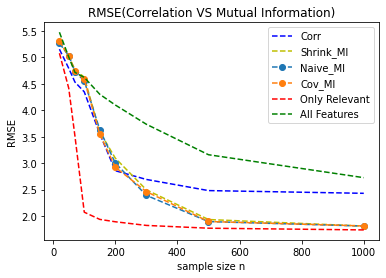

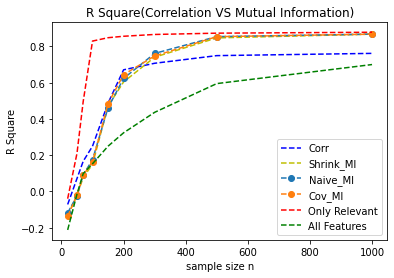

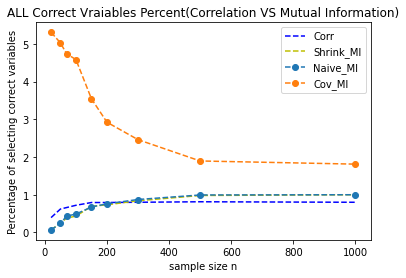

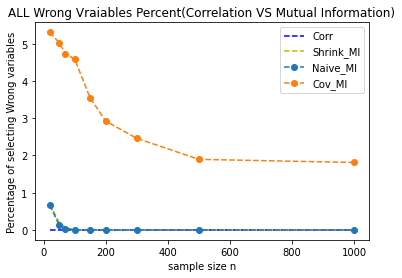

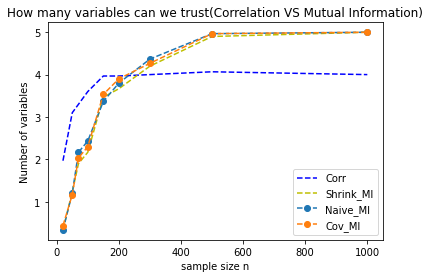

In [30]:
fig = plt.figure()

get_plot([20, 50, 70, 100, 150, 200, 300, 500, 1000])